In [39]:
wordList = []

with open('test_transcript1.txt', "r") as f:
    for line in f:
        wordList.extend(line.split())

In [41]:
for x in wordList:
    if x == 'PATIENT':
        wordList.remove(x)
    elif x == 'COUNSELOR':
        wordList.remove(x)

In [42]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer

import re
import json

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+@#!?,;')

In [43]:
with open('positive-words.txt') as f:
    p_txt = f.read()
    p_txt = re.sub('[,\.()":;!@#$%^&*\d]|\'s|\'', '', p_txt)
    p_list = p_txt.replace('\n',' ').replace('  ',' ').lower().split(' ')

In [44]:
with open('negative-words.txt', encoding = "ISO-8859-1") as f:
    n_txt = f.read()
    n_txt = re.sub('[,\.()":;!@#$%^&*\d]|\'s|\'', '', n_txt)
    n_list = n_txt.replace('\n',' ').replace('  ',' ').lower().split(' ')

In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
word_count_dict = {}
word_count_positive = {}
word_count_negative= {}

In [47]:
def tally(wordlist):
    for word in wordlist:
         # count all words frequency
        if word in word_count_dict.keys():
            word_count_dict[word] += 1
        else:
            word_count_dict[word] = 1
            # count if it is a positive word
        if word in p_list:
            if word in word_count_positive.keys():
                word_count_positive[word] += 1
            else:
                word_count_positive[word] = 1
        # else see if it is a negative word
        elif word in n_list:
            if word in word_count_negative.keys():
                word_count_negative[word] += 1
            else:
                word_count_negative[word] = 1
        else: 
                pass
    pos = sum(word_count_positive.values())
    neg = sum(word_count_negative.values())
    return([pos, neg])

In [48]:
tally(wordList)

[1229, 102]

In [49]:
# Saving lists of sorted dictionaries 
list_dict = sorted(word_count_dict.items(), key=lambda x:x[1], reverse=True)
list_positive = sorted(word_count_positive.items(), key=lambda x:x[1], reverse=True)
list_negative = sorted(word_count_negative.items(), key=lambda x:x[1], reverse=True)

In [50]:
list_positive

[('that', 125),
 ('you', 102),
 ('like', 98),
 ('and', 87),
 ('of', 87),
 ('be', 67),
 ('the', 60),
 ('a', 59),
 ('love', 59),
 ('not', 54),
 ('in', 38),
 ('this', 37),
 ('they', 29),
 ('or', 27),
 ('mean', 26),
 ('can', 22),
 ('if', 20),
 ('as', 13),
 ('on', 13),
 ('all', 13),
 ('are', 13),
 ('work', 11),
 ('these', 10),
 ('right', 10),
 ('does', 8),
 ('see', 8),
 ('one', 8),
 ('an', 6),
 ('loves', 6),
 ('best', 5),
 ('from', 5),
 ('good', 4),
 ('frequently', 4),
 ('wonderful', 4),
 ('will', 4),
 ('enough', 4),
 ('constructive', 3),
 ('rational', 3),
 ('negative', 3),
 ('many', 3),
 ('lovable', 3),
 ('necessarily', 2),
 ('important', 2),
 ('use', 2),
 ('support', 2),
 ('loved', 2),
 ('worthy', 2),
 ('healthy', 2),
 ('comforting', 2),
 ('positive', 2),
 ('loving', 2),
 ('happy', 2),
 ('easy', 2),
 ('pretty', 2),
 ('perfect', 2),
 ('productive', 1),
 ('recommended', 1),
 ('glad', 1),
 ('improve', 1),
 ('worth', 1),
 ('fast', 1),
 ('worked', 1),
 ('supporting', 1),
 ('attentive', 1),
 ('

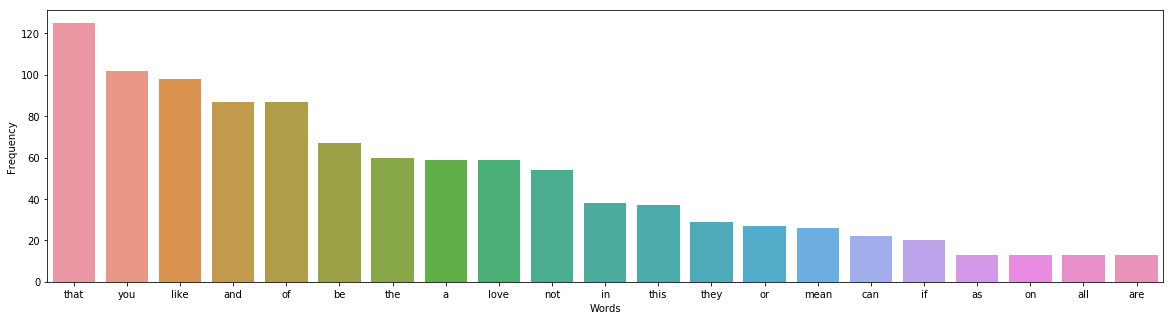

In [51]:
import matplotlib.pyplot as plt
list_positive_20 = list_positive[0:21]
df = pd.DataFrame(list_positive_20)
import seaborn as sns
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df, x= 0, y = 1)
ax.set(ylabel = 'Frequency', xlabel='Words')
plt.show()

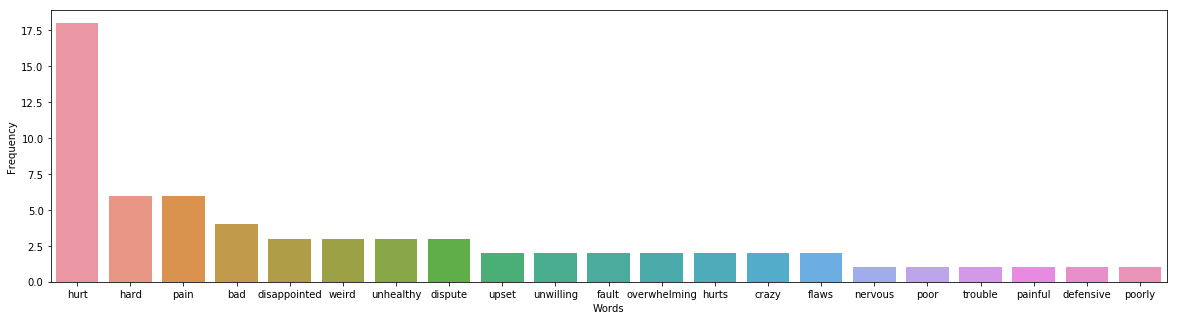

In [52]:
list_negative_20 = list_negative[0:21]
df = pd.DataFrame(list_negative_20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df, x= 0, y = 1)
ax.set(ylabel = 'Frequency', xlabel='Words')
plt.show()

In [53]:
!pip install wordcloud

In [54]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

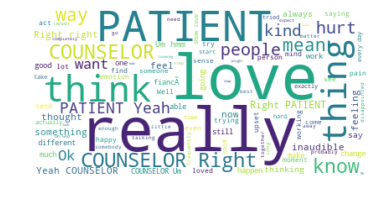

In [55]:
f = open("test_transcript1.txt", "r")
text = f.read()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()